In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc,accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

## Cargamos el dataset

In [2]:
dataframe = pd.read_csv('fuel.csv', encoding='ISO-8859-1')

## Creamos la columna para trabajar con la regresión logística.
Como tiene que ser binaria, vamos a crear una nueva columna a partir de una que ya tenemos pero en formato binario, en este caso la columna tendrá un 1 si es mayor que la media de la columna original o 0 si no.
- Calculamos la media de la columna CO2 Emissions (g/km)
- Creamos la nueva columna

In [3]:
# Calcular la media de CO2
media_co2 = dataframe['CO2 Emissions (g/km)'].mean()
# Si el dato de la columna es mayor que la media es True, que con el .astype(int) se transforma en un 1 y si no en un 0
dataframe['CO2_Binario'] = (dataframe['CO2 Emissions (g/km)'] > media_co2).astype(int)

## Creamos las variables con los datos que vamos a user para nuestro modelo

In [4]:
# Seleccionar la variable explicativa y la variable objetivo binaria
x = dataframe[['Fuel Consumption (L/100Km)']].values
y = dataframe['CO2_Binario']

## Escalamos entre 0 y 1 para evitar que los números grandes afecten más al resultado.
En este caso no sería muy necesario, es más importante si usamos multivariable y sobre todo si tenemos un rango de datos con mucha diferencia entre sus extremos


In [5]:
# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

## Dividimos datos entre entrenamiento y test

In [6]:
# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Creamos el modelo de regression logística

In [7]:
# Crear el modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=10000)

## Entrenamos el modelo

In [8]:
# Entrenar el modelo con el conjunto de entrenamiento
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

## Realizamos las predicciones con la prueba

In [9]:
# Realizar predicciones con el conjunto de prueba
y_pred = log_reg.predict(X_test)

## Calculamos la predicción

In [10]:
# Calcular Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 92.81%


## Calculamos la matríz de confusión

In [11]:
# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(cm)


Matriz de Confusión:
[[94  5]
 [ 7 61]]


## Dibujamos la matriz de confusión

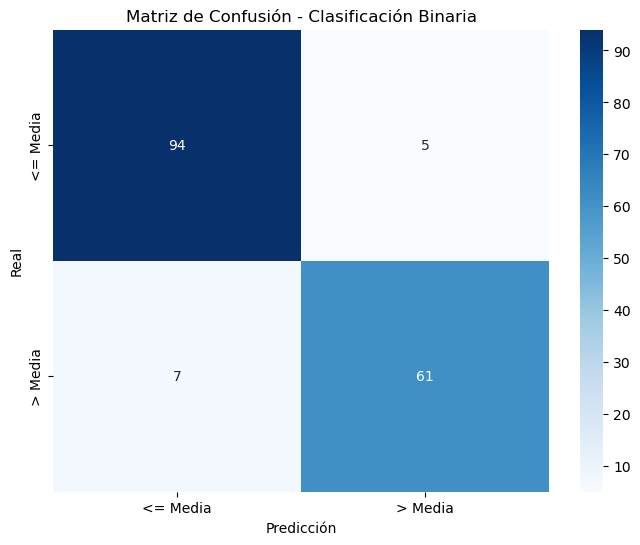

In [12]:
# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["<= Media", "> Media"], yticklabels=["<= Media", "> Media"])
plt.title('Matriz de Confusión - Clasificación Binaria')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

## HAcemos las predicciones con el conjunto de prueba

In [13]:
# Realizar predicciones con el conjunto de prueba (probabilidades) para ROC
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Probabilidades de la clase 1 (> Media)

## Calculamos los valores para la curva ROC

- Calculamos la curva

- Calculamos el AUC

In [14]:
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcular el AUC (Área Bajo la Curva)
roc_auc = auc(fpr, tpr)

## Dibujamos la gráfica ROC


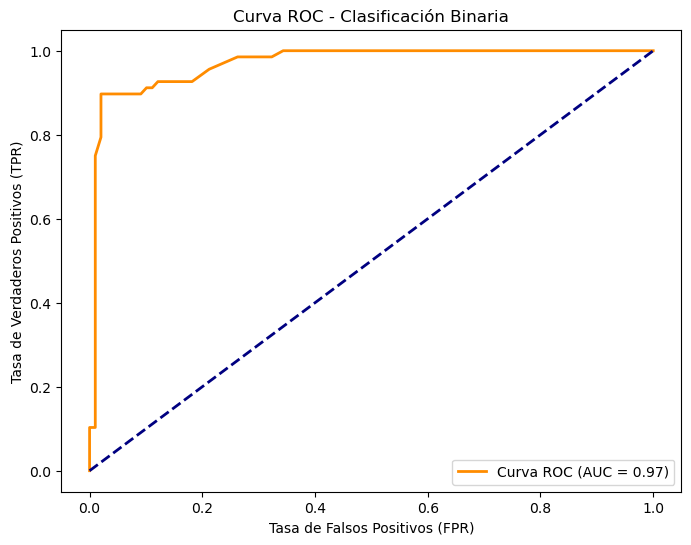

In [15]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea de referencia (AUC = 0.5)
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Clasificación Binaria')
plt.legend(loc='lower right')
plt.show()

In [16]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        99
           1       0.92      0.90      0.91        68

    accuracy                           0.93       167
   macro avg       0.93      0.92      0.93       167
weighted avg       0.93      0.93      0.93       167

